**LINEAR REGRESSION**
*UNIVERIATE*

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [123]:
weeks_data = [1,2,3,4,5]
sales_data = [2,4,5,4,5]

df = pd.DataFrame({'weeks':weeks_data,
                   'Sales':sales_data})
df

,weeks,Sales
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [124]:
X = df['weeks'].values
Y = df['Sales'].values

In [125]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)**2

m = numer/denom
c = mean_y - (m* mean_x)
print(f"m:{m}")
print(f"c:{c}")

m:0.6
c:2.2


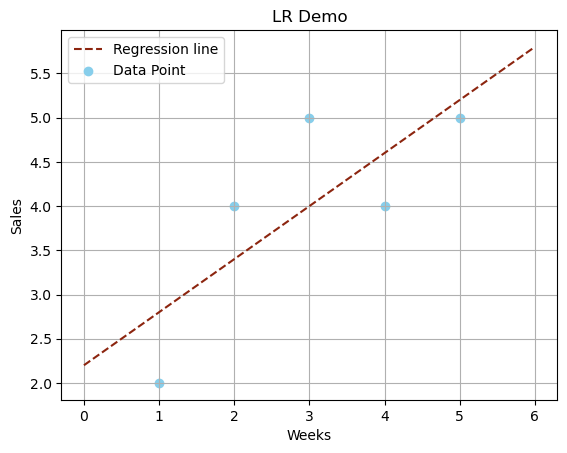

In [126]:
max_x = np.max(X)+1
min_x = np.min(X)-1

x = np.linspace(min_x,max_x)
y = (m*x)+c
plt.plot(x, y, color='#8c250f', label='Regression line', linestyle='--')
plt.scatter(X, Y, color='skyblue', label='Data Point')
plt.xlabel("Weeks")
plt.ylabel("Sales")
plt.title("LR Demo")
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [127]:
arr_new = []
for i in range(len(X)):
    y = (m*X[i])+c
    arr_new.append(y)

In [128]:
arr_new

[2.8000000000000003, 3.4000000000000004, 4.0, 4.6, 5.2]

In [129]:
#R2

ss_tot = 0
ss_res = 0

for i in range(n):
    pred_y = (m*X[i])+c
    ss_tot += (Y[i] - mean_y)**2
    ss_res += (Y[i] - pred_y)**2

r2 = 1 - ss_res/ss_tot
print(f"R2:{r2}")

R2:0.6000000000000001


LINEAR REGRESSION (univariate)

In [ ]:
df = pd.read_csv("headbrain.csv")

In [145]:
df.head(15)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [132]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [133]:
df.shape

(237, 4)

In [134]:
df.info(),df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


(None,
            Gender   Age Range  Head Size(cm^3)  Brain Weight(grams)
 count  237.000000  237.000000       237.000000           237.000000
 mean     1.434599    1.535865      3633.991561          1282.873418
 std      0.496753    0.499768       365.261422           120.340446
 min      1.000000    1.000000      2720.000000           955.000000
 25%      1.000000    1.000000      3389.000000          1207.000000
 50%      1.000000    2.000000      3614.000000          1280.000000
 75%      2.000000    2.000000      3876.000000          1350.000000
 max      2.000000    2.000000      4747.000000          1635.000000)

In [135]:
# Taking x and y variables
X = df['Head Size(cm^3)'].values
Y =  df['Brain Weight(grams)'].values

In [136]:
X = X.reshape(-1,1)

In [137]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [138]:
lr = LinearRegression()

In [139]:
lr.fit(X_train,Y_train)

LinearRegression()

In [140]:
Y_pred = lr.predict(X_test)

In [141]:
r2 = r2_score(Y_test,Y_pred)
r2

0.7175800542114279

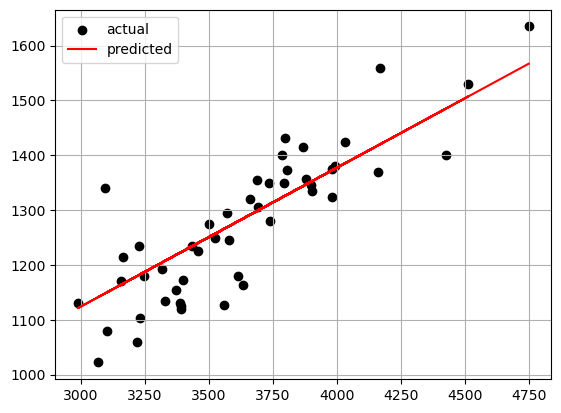

In [142]:
plt.scatter(X_test,Y_test,color='black',label="actual")
plt.plot(X_test,Y_pred,color='red',label="predicted")
plt.legend()
plt.grid()

In [144]:
lr.predict([[4261]])

array([1443.74752553])